In [10]:
include("./common.jl")

Common libraries imported and functions defined


In [5]:
A = [1, 1, 1]

3-element Array{Int64,1}:
 1
 1
 1

In [6]:
B = [1, 1, 1]

3-element Array{Int64,1}:
 1
 1
 1

In [7]:
conv(A, B)

5-element Array{Int64,1}:
 1
 2
 3
 2
 1

## Convolution Examples

In [3]:
x = [0, 0, 0, 1, 1, 1, 0, 0, 0]

9-element Array{Int64,1}:
 0
 0
 0
 1
 1
 1
 0
 0
 0

In [5]:
y = conv(x, x)

17-element Array{Int64,1}:
 0
 0
 0
 0
 0
 0
 1
 2
 3
 2
 1
 0
 0
 0
 0
 0
 0

In [7]:
length(x), length(y)

(9, 17)

In [20]:
len_x = length(x)
n = 1:length(y)

1:17

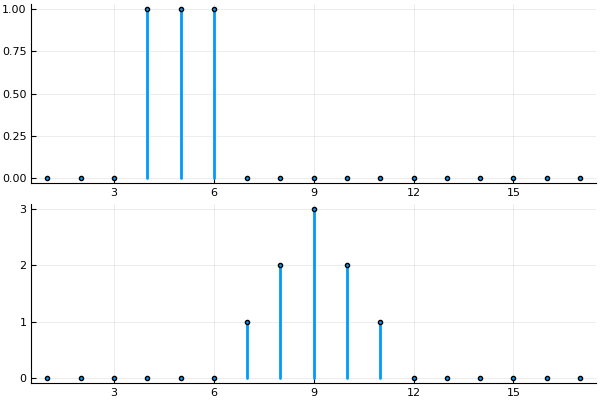

In [23]:
resize!(x, length(y))
x[len_x+1 : end] = 0
stem(n, [x y], layout=(2,1))

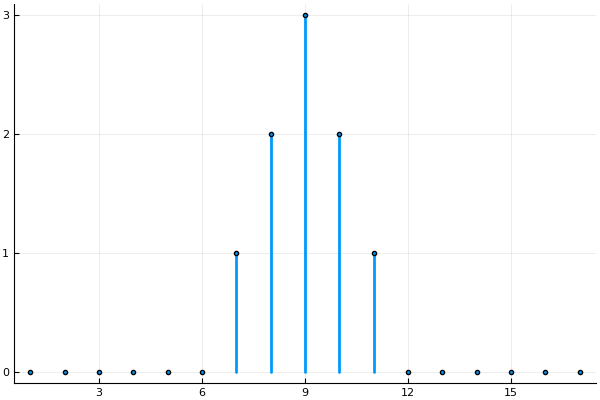

In [18]:
n = 1:17
stem(n, y)

### Smooth out noise (moving average)

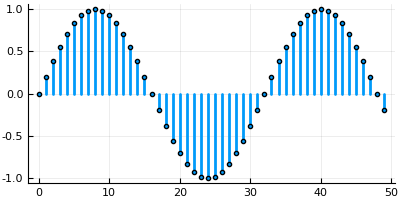

In [36]:
N = 50
n = 0:N-1
s = sin.(2π * n / 32)
stem(n, s, size=(400,200))

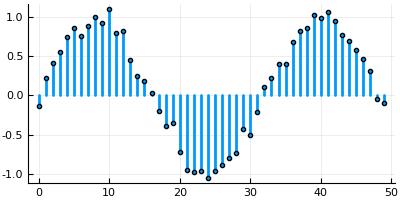

In [51]:
x = s + 0.1 * randn(N)
stem(n, x, size=(400,200))

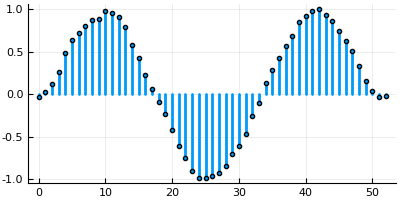

In [52]:
# moving average
M = 4
h = ones(M) / M
y = conv(x, h)
stem(0:length(y)-1, y, size=(400,200))

## Example - Edge Detection

In [59]:
function piecewise_signal(N)
    A = Array{Float64, 1}(2N)
    for i in 1:N
        A[i] = i
        A[2N-i+1] = -i
    end
    A
end

piecewise_signal (generic function with 1 method)

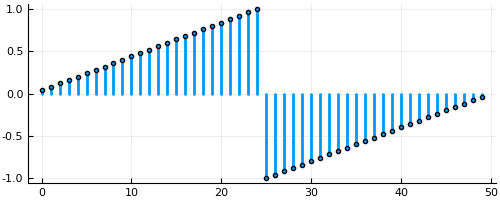

In [62]:
s = piecewise_signal(25) / 25
stem(0:length(s)-1, s, size=(500,200))

In [63]:
## Haar wavelet edge detector
w = [-ones(2); ones(2)] / 4

4-element Array{Float64,1}:
 -0.25
 -0.25
  0.25
  0.25

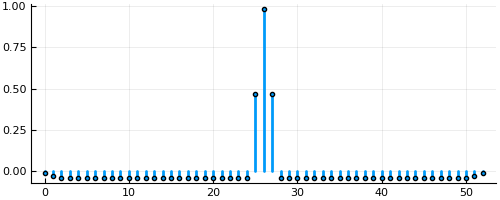

In [66]:
y = conv(s, w)
stem(0:length(y)-1, y, size=(500,200))